<a href="https://colab.research.google.com/github/nikhilkumarreddy/Check-perfect-JIO-DATA-plan-for-you-/blob/master/playground1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyPDF2 

     |████████████████████████████████| 81kB 3.0MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=2e15a292065d66ad30c8e5d9ed3db25fda14bb1fb29faa8f8cec6b61754103df
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [3]:
import time
import PyPDF2
import re
import os

In [4]:
def data(ab): 
  dataa = ''
  x = 0
  for i in ab:
    if i == '.':
      x = ab.index(i)
      #print(x)
  dataa = ab[:x]+ab[x:x+4]
  return float(dataa)
  

print(data('1064.8251064.8251064.8250.0000.0'))



1064.825


In [5]:
def data_plan(total):
  plan_name = ''
  day = total.find('/day')

  for i in range(day-4 , day):
    plan_name += total[i]

  return plan_name
    


In [6]:
dict ={}
def Data_days(total):
  
  pattern = 'JIO'
  finall = [match.start() for match in re.finditer(pattern, total)] 

  for j in finall:
    abc = ''
    for i in range(j-36, j):
      abc +=total[i]
      dates = abc[:9]

    abcd = ''
    for k in range(j+6 , j+15):
      abcd += total[k]
      datas = data(abcd)

    
    if dates in dict:
      dict[dates] = dict.get(dates) + datas
 
    else:
      dict[dates] = datas
    
  return dict




In [7]:
#difference the pan and useage
waste_dict  = {}
def waste_data(dict , plan):
  for i  , j in dict.items():
    waste_dict[i] = plan - j

  return waste_dict

    


In [8]:
#counts the waste and over waste
def waste_over(waste_dict):
  ok = waste_dict.values()
  ok = list(ok)

  over_data_1 = 0
  waste_data_1 = 0

  for i in ok:
    if i <= 0:
      waste_data_1 += i
    else:
      over_data_1 += i

  #print(waste_data_1 , over_data_1)

  return waste_data_1 , over_data_1



In [9]:
def percentage_calculate(plan_list , waste_data_1 , over_data_1):
  total_data = 0
  percentage = 0 
  for i in plan_list:
    total_data += i*30 

  percentage = waste_data_1 / total_data * 100

  return percentage 


def extra_data_plan(waste_dict ):
  waste_dict -= waste_dict % -1000

  return abs(waste_dict)



In [10]:
import matplotlib.pyplot as plt
def plot(percentage ):
  labels = 'Data_Wasted', 'Data_Used' 
  sizes = [percentage ,  100 - percentage]
  explode = ( 0.1 , 0)  
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal') 
  plt.show()


In [32]:
#Main function

start = time.process_time()
dict = {}
plan_list = []
waste_data_1 = 0
over_data_1 = 0
for file in os.listdir("/content/drive/My Drive/jio/"):
  if file.endswith(".pdf"):
    FileName = os.path.join("/content/drive/My Drive/jio/", file)
    pdf = open(FileName, "rb")
          
    Pdf = PyPDF2.PdfFileReader(pdf)

    for i in range(0, Pdf.getNumPages()):
      PageObj = Pdf.getPage(i)
      total = PageObj.extractText()
      if i == 1:
        plan = data_plan(total)[0]

        plan = int(plan + '000')
        plan_list.append(plan)


  
      dict = Data_days(total)

    waste = waste_data(dict , plan)
    over_data_1 , waste_data_1 = waste_over(waste_dict)

    percentage = percentage_calculate(plan_list , waste_data_1 , over_data_1)
    extra_plan = extra_data_plan(over_data_1 )


#plot( percentage )

  
average_data  = sum(dict.values()) / len(dict)  
#print(dict)
print(plan_list)
print("u wasted {0:.0f}"  .format(percentage),'% of ur data')
print("add on data used" , extra_plan/1000 , 'GB')

print("average data used {0:.0f}"  .format(average_data), 'MB per day')

print("time taken to run this pogram -- = " , time.process_time() - start)

[2000, 2000, 2000, 2000, 2000]
u wasted 5 % of ur data
add on data used 93.0 GB
average data used 2525 MB per day
time taken to run this pogram -- =  1.8588896550000058


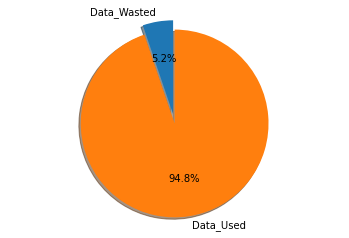

In [15]:
plot(percentage )

In [38]:
print(waste_data_1 , over_data_1)
print(waste_over(waste_dict))

15147.847000000002 -5453.413000000001
(-5453.413000000001, 15147.847000000002)


In [31]:
len(waste_dict)
waste_dict
# positive values are wasted and negative values are add on data

{'01-MAR-20': 443.9660000000001,
 '02-MAR-20': 1200.5819999999999,
 '03-MAR-20': 218.5340000000001,
 '04-MAR-20': 611.0559999999998,
 '05-MAR-20': 422.51,
 '06-MAR-20': 793.5990000000002,
 '07-MAR-20': 57.567000000000235,
 '08-MAR-20': -210.1949999999997,
 '09-MAR-20': 448.65599999999995,
 '10-MAR-20': 857.2889999999998,
 '11-MAR-20': 180.24500000000012,
 '12-MAR-20': -162.067,
 '13-MAR-20': 544.9479999999999,
 '14-MAR-20': -161.23599999999988,
 '15-MAR-20': -565.9710000000005,
 '16-MAR-20': 365.01099999999997,
 '17-MAR-20': 524.671,
 '18-MAR-20': 489.6060000000002,
 '19-MAR-20': 31.450000000000045,
 '20-MAR-20': 1024.4,
 '21-MAR-20': 902.512,
 '22-MAR-20': 748.2640000000001,
 '23-MAR-20': 1094.5259999999998,
 '24-MAR-20': 94.94699999999966,
 '25-MAR-20': -4353.944000000001,
 '26-MAR-20': 714.096,
 '27-MAR-20': 900.857,
 '28-MAR-20': 777.327,
 '29-MAR-20': 724.7530000000002,
 '30-MAR-20': 976.4750000000001}

In [32]:
plan_list

[2000]